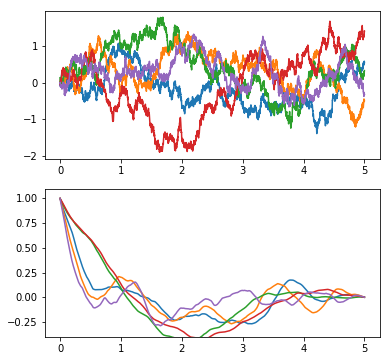

In [17]:
import numpy as np
#import matplotlib
#matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt

% matplotlib inline





num_sims = 5 ### display five runs

t_init = 0
t_end  = 5

y_init = 0
N      = 5000 ### Compute 1000 grid points 

k0=1
k1=1

dt    = float(t_end - t_init) / N
ts    = np.arange(t_init, t_end, dt)
ys    = np.zeros(N)

ys[0] = y_init
plt.figure(figsize=(6,6))

ax0 = plt.subplot(211)
ax1 = plt.subplot(212,ylim=[-0.4,1.1])


for i_sim in range(num_sims):
    for i in range(1, ts.size):
        ys[i] = ys[i-1]  - k0*ys[i-1] * dt + k1 * np.random.normal(loc = 0.0, scale = np.sqrt(dt))
    yunbiased = ys-np.mean(ys)
    ynorm = np.sum(yunbiased**2)
    acor = np.correlate(yunbiased, yunbiased, "full")/ynorm
    # use only second half
    acor = acor[len(acor)/2:]


    ax0.plot(np.arange(len(ys))*dt, ys)
    ax1.plot(np.arange(len(acor))*dt, acor)
plt.show()
